In [3]:
# !pip install imutils

In [7]:
import cv2
import imutils
import time
import numpy as np
import matplotlib.pyplot as plt


MODEL_MEAN_VALUES = (78.4263377603, 87.7689143744, 114.895847746)
age_list = ['(0, 2)', '(4, 6)', '(8, 12)', '(15, 20)', '(25, 32)', '(38, 43)', '(48, 53)', '(60, 100)']
gender_list = ['Male', 'Female']

In [16]:
def initialize_caffe_models():
	
	age_net = cv2.dnn.readNetFromCaffe(
		'data/deploy_age.prototxt', 
		'data/age_net.caffemodel')

	gender_net = cv2.dnn.readNetFromCaffe(
		'data/deploy_gender.prototxt', 
		'data/gender_net.caffemodel')

	return(age_net, gender_net)

Gender : Female
Age Range: (8, 12)


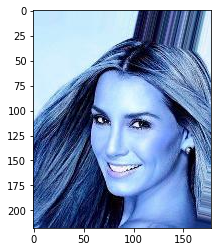

In [17]:
# Get Face 
file = '../face_generator/celebA/img_align_celeba/img_align_celeba/000001.jpg'
face_img = cv2.imread(file,cv2.IMREAD_COLOR)
plt.imshow(face_img)
age_net, gender_net = initialize_caffe_models()
blob = cv2.dnn.blobFromImage(face_img, 1, (227, 227), MODEL_MEAN_VALUES, swapRB=False)

#Predict Gender
gender_net.setInput(blob)
gender_preds = gender_net.forward()
gender = gender_list[gender_preds[0].argmax()]
print("Gender : " + gender)

#Predict Age
age_net.setInput(blob)
age_preds = age_net.forward()
age = age_list[age_preds[0].argmax()]
print("Age Range: " + age)